In [207]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files, IF we need it, I probably won't

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...

Libraries imported.



conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


I downloaded the New York dataset, and ran it through an online converter to turn json into csv

In [208]:
newyork_data = pd.read_csv('newyork_data.csv')

In [209]:
newyork_data.head() #let's see what we've got in the dataset

,type,totalFeatures,features__type,features__id,features__geometry__type,features__geometry__coordinates__001,features__geometry__coordinates__002,features__geometry_name,features__properties__name,features__properties__stacked,features__properties__annoline1,features__properties__annoline2,features__properties__annoline3,features__properties__annoangle,features__properties__borough,features__properties__bbox__001,features__properties__bbox__002,features__properties__bbox__003,features__properties__bbox__004,crs__type,crs__properties__name,bbox
0,FeatureCollection,306.0,Feature,nyu_2451_34572.1,Point,-73.847201,40.894705,geom,Wakefield,1,Wakefield,NaN,NaN,0,Bronx,-73.847201,40.894705,-73.847201,40.894705,name,urn:ogc:def:crs:EPSG::4326,-74.249260
1,NaN,NaN,Feature,nyu_2451_34572.2,Point,-73.829939,40.874294,geom,Co-op City,2,Co-op,City,NaN,0,Bronx,-73.829939,40.874294,-73.829939,40.874294,NaN,NaN,40.503319
2,NaN,NaN,Feature,nyu_2451_34572.3,Point,-73.827806,40.887556,geom,Eastchester,1,Eastchester,NaN,NaN,0,Bronx,-73.827806,40.887556,-73.827806,40.887556,NaN,NaN,-73.706161
3,NaN,NaN,Feature,nyu_2451_34572.4,Point,-73.905643,40.895437,geom,Fieldston,1,Fieldston,NaN,NaN,0,Bronx,-73.905643,40.895437,-73.905643,40.895437,NaN,NaN,40.910561
4,NaN,NaN,Feature,nyu_2451_34572.5,Point,-73.912585,40.890834,geom,Riverdale,1,Riverdale,NaN,NaN,0,Bronx,-73.912585,40.890834,-73.912585,40.890834,NaN,NaN,NaN


Let's make a proper dataset out of this

In [210]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [211]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


I will now fill  the columns with the appropriate data

In [212]:
neighborhoods['Borough'] = newyork_data['features__properties__borough']
neighborhoods['Neighborhood'] = newyork_data['features__properties__annoline1']
neighborhoods['Latitude'] = newyork_data['features__properties__bbox__002']
neighborhoods['Longitude'] = newyork_data['features__properties__bbox__003']

In [213]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [214]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.


In [215]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Now we have the coordinates of NYC, perfect! ^


#### Let's do a map of New York with neighborhoods superimposed on top.

In [216]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

 Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [217]:
CLIENT_ID = 'S5HG1NT0UHCHD0GNKCNKRYZYWGFH2HBJ44ZBRC2AO2BZANRK' # your Foursquare ID
CLIENT_SECRET = 'XUIRX5NYUYHD4XXJE4TBCPQT2CXI2COERGGCG5BAGN0HPWC3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S5HG1NT0UHCHD0GNKCNKRYZYWGFH2HBJ44ZBRC2AO2BZANRK
CLIENT_SECRET:XUIRX5NYUYHD4XXJE4TBCPQT2CXI2COERGGCG5BAGN0HPWC3


#### Let's explore the first neighborhood in our dataframe.

In [218]:
neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

Get the neighborhood's latitude and longitude values.

In [219]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.894705176609996, -73.84720052054901.


#### Now, let's get the top 100 venues that are in Wakefield within a radius of 500 meters.

In [220]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=S5HG1NT0UHCHD0GNKCNKRYZYWGFH2HBJ44ZBRC2AO2BZANRK&client_secret=XUIRX5NYUYHD4XXJE4TBCPQT2CXI2COERGGCG5BAGN0HPWC3&v=20180605&ll=40.894705176609996,-73.84720052054901&radius=500&limit=100'

In [221]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e739d9047b43d0023afe8ae'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 40.89920518111, 'lng': -73.84125857127493},
   'sw': {'lat': 40.890205172109994, 'lng': -73.85314246982308}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLngs

Let's create a function to see all venues in all neighborhoods of New York

In [222]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.


In [224]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [225]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Rite Aid,Pharmacy,40.896649,-73.844846
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Walgreens,Pharmacy,40.896687,-73.844850
4,Dunkin',Donut Shop,40.890459,-73.849089


Now write the code to run the above function on each neighborhood and create a new dataframe called newyork_venues

In [226]:
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )



Wakefield
Co-op
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City
Bedford
University
Morris
Fordham
East
West
Highbridge
Melrose
Mott Haven
Port
Longwood
Hunts
Morrisania
Soundview
Clason
Throgs Neck
Country
Parkchester
Westchester
Van
Morris Park
Belmont
Spuyten
North
Pelham
Schuylerville
Edgewater
Castle
Olinville
Pelham
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset
Greenpoint
Gravesend
Brighton
Sheepshead
Manhattan
Flatbush
Crown
East Flatbush
Kensington
Windsor
Prospect
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn
Cobble
Carroll
Red
Gowanus
Fort
Park
Cypress
East New York
Starrett
Canarsie
Flatlands
Mill
Manhattan
Coney Island
Bath
Borough
Dyker
Gerritsen
Marine Park
Clinton
Sea
Downtown
Boerum
Prospect
Ocean
City
Bergen
Midwood
Prospect
Georgetown
East
North Side
South Side
Ocean
Fort
Chinatown
Washington
Inwood
Hamilton
Manhattanville
Central
East
Upper
Yorkville
Lenox
Roosevelt Island
Up

In [227]:
print(newyork_venues.shape)
newyork_venues.head()

(10324, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896687,-73.844850,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


Let's create a dataframe of all Indian Restaurants in New York

In [228]:
indian = newyork_venues[newyork_venues['Venue Category']=='Indian Restaurant']

In [229]:
indian.shape

(77, 7)

In [230]:
print('So we have ' + str(indian.shape[0]) + ' indian restaurants in New York')

So we have 77 indian restaurants in New York


# Machine learning section:

Let's create a scatter plot and see where the indian restaurants are located

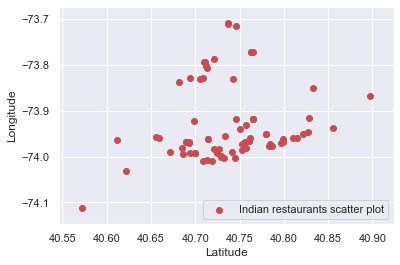

In [193]:
import seaborn as sns #gotta love seaborn
import matplotlib.pyplot as plt
sns.set()
plt.scatter(indian['Venue Latitude'], indian['Venue Longitude'], c='r', label="Indian restaurants scatter plot")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='lower right')
plt.figsize=(100, 6)
plt.show()

Now we will run a k-means algorithm to cluster the Indian restaurants into 4 clusters

In [231]:
from sklearn.cluster import KMeans

In [202]:
dfkmc = indian[['Venue Latitude', 'Venue Longitude']] #dataframe with just the location data

#rename the columns to x and y
dfkmc.rename(columns={'Venue Latitude': 'x', 'Venue Longitude': 'y'}, inplace=True)
dfkmc.head()

,x,y
161,40.897625,-73.867147
1068,40.833293,-73.851040
1132,40.622371,-74.031799
1333,40.733321,-73.954928
1782,40.698094,-73.921355


In [200]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(dfkmc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [238]:
labels = kmeans.predict(dfkmc)
centroids = kmeans.cluster_centers_

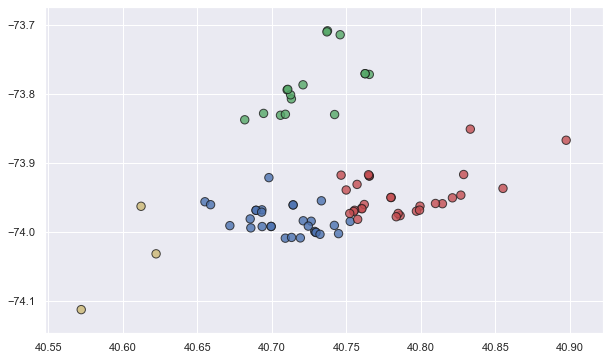

In [239]:
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
k=4
color=colmap[k]
fig = plt.figure(figsize=(10, 6))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
try:
    plt.scatter(dfkmc['x'], dfkmc['y'], color=colors1, alpha=0.8, edgecolor='k', s=70)
    for idx, centroids in enumerate(centroids):
        plt.scatter(*centroid, color=colmap[idx+1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
except TypeError:
    print("")
except NameError:
    print("")

In order to know where to put the delivery centers, we need to know the coordinates that are right in the middle of each cluster

In [206]:
kmeans.cluster_centers_ #this will give us the coordinates we need

array([[ 40.78798302, -73.94642381],
       [ 40.72579975, -73.78655571],
       [ 40.70861378, -73.98285651],
       [ 40.60225783, -74.03578544]])